In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats

np.random.seed(42)

In [2]:
hw4 = pd.read_excel('/Users/huangzm/Desktop/Intro BA/HW4.xlsx')
hw4.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


## Data Exploration


In [3]:
print(hw4.dtypes)
hw4.describe()

sequence_number           int64
US                        int64
source_a                  int64
source_c                  int64
source_b                  int64
source_d                  int64
source_e                  int64
source_m                  int64
source_o                  int64
source_h                  int64
source_r                  int64
source_s                  int64
source_t                  int64
source_u                  int64
source_p                  int64
source_x                  int64
source_w                  int64
Freq                      int64
last_update_days_ago      int64
1st_update_days_ago       int64
Web order                 int64
Gender=male               int64
Address_is_res            int64
Purchase                  int64
Spending                float64
dtype: object


,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.560745
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.749816
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,1.855000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,152.532500
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.060000


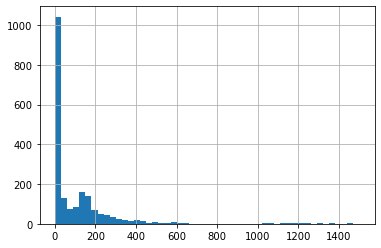

In [4]:
hw4['Spending'].hist(bins=50)

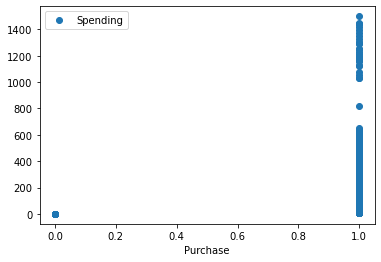

In [5]:
# to confrim if Pruchase = 0, Spending must be 0
hw4.plot(x='Purchase', y='Spending',style='o')

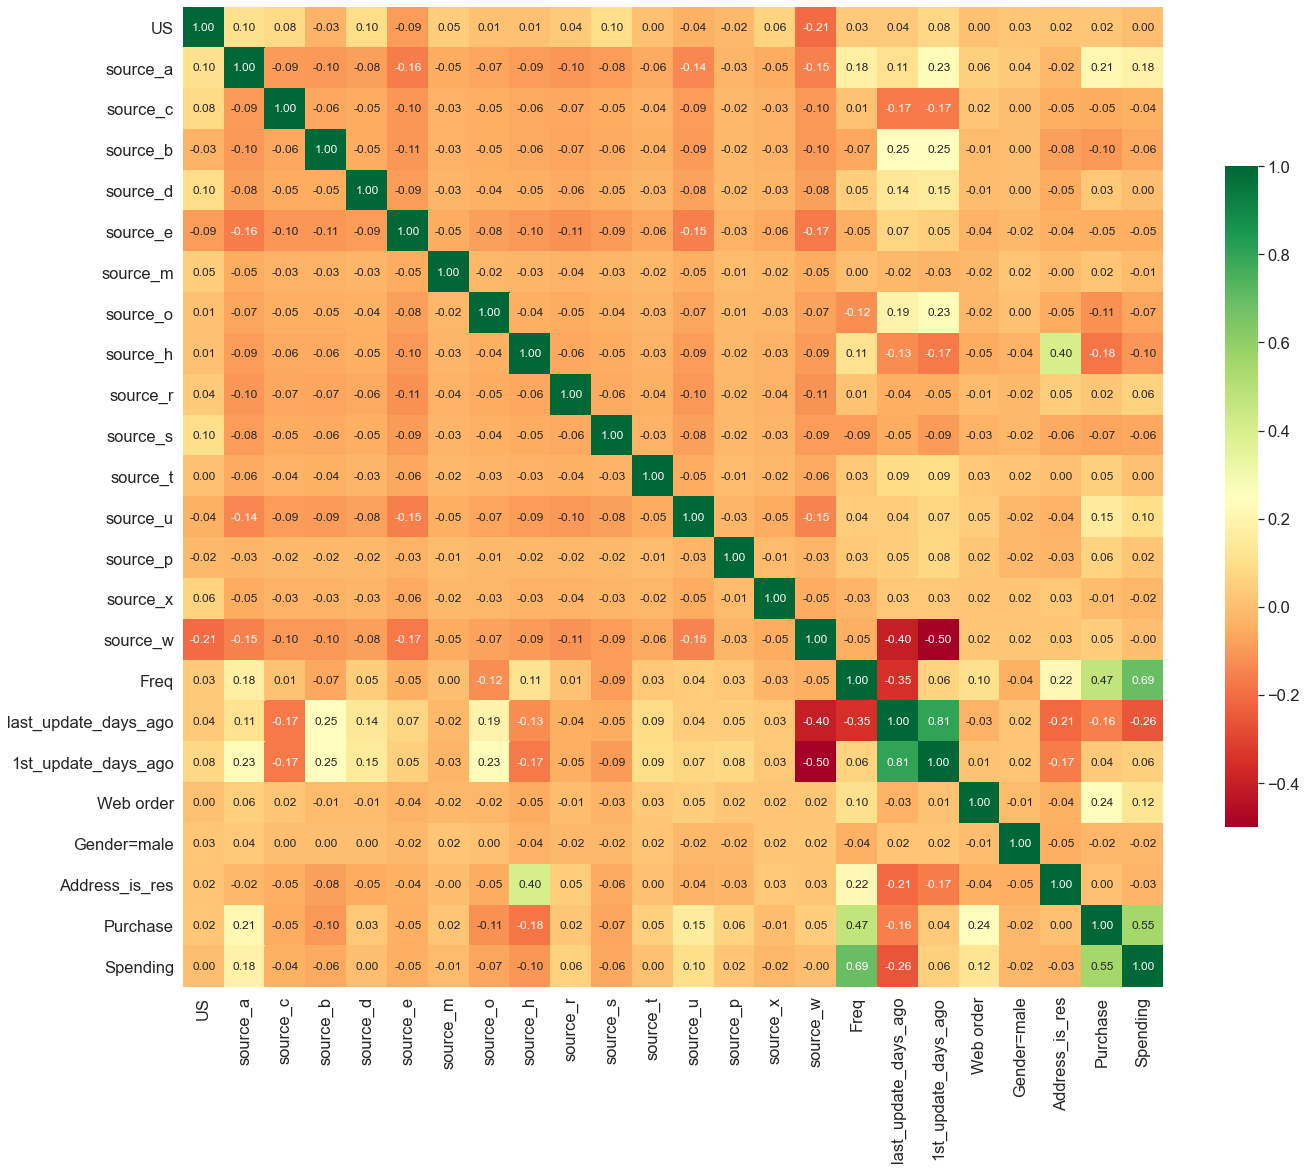

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = np.corrcoef(hw4.iloc[:,1:].values.T) 
plt.figure(figsize=(20,20)) 
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,       
                 fmt='.2f',annot_kws={'size': 12}, cbar_kws={"shrink": 0.5},cmap="RdYlGn",
                 yticklabels=list(hw4.iloc[:,1:].columns), 
                 xticklabels=list(hw4.iloc[:,1:].columns))
plt.tight_layout()
plt.show()

US
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Spending, dtype: object

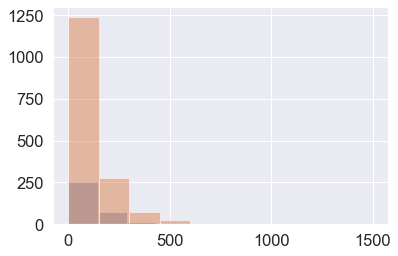

In [7]:
hw4.groupby('US').Spending.hist(alpha=0.5)

Gender=male
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Spending, dtype: object

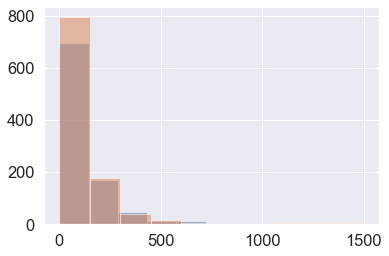

In [8]:
hw4.groupby('Gender=male').Spending.hist(alpha=0.5)

## 1.Numeric Preiction Models

In [9]:
X = hw4.iloc[:,1:23] # exclude Purchase and Spending
y = hw4.iloc[:,24]

In [10]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
cv = KFold(n_splits=10, shuffle=True,random_state = 42)
inner_cv = KFold(n_splits=10, shuffle=True,random_state = 42)

### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
score_slr = cross_val_score(slr, X=X, y=y, cv=cv, scoring='neg_root_mean_squared_error')
print("CV Accuracy: ",score_slr.mean(), " +/- ", score_slr.std())

CV Accuracy:  -126.06724945699139  +/-  20.684333990877


### KNN

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

knn = neighbors.KNeighborsRegressor(n_neighbors=5)
score_knn = cross_val_score(knn, X=X_std, y=y, cv=cv, scoring='neg_root_mean_squared_error')
print("CV Accuracy: ",score_knn.mean(), " +/- ", score_knn.std())

CV Accuracy:  -144.09510742970662  +/-  23.993775245869656


### Regression Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
score_dt = cross_val_score(dt, X=X, y=y, cv=cv, scoring='neg_root_mean_squared_error')
print("CV Accuracy: ",score_dt.mean(), " +/- ", score_dt.std())

CV Accuracy:  -163.342522035046  +/-  30.640963712178937


## 2.Feature Engineering

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa81fc0cd30>,
      dtype=object)

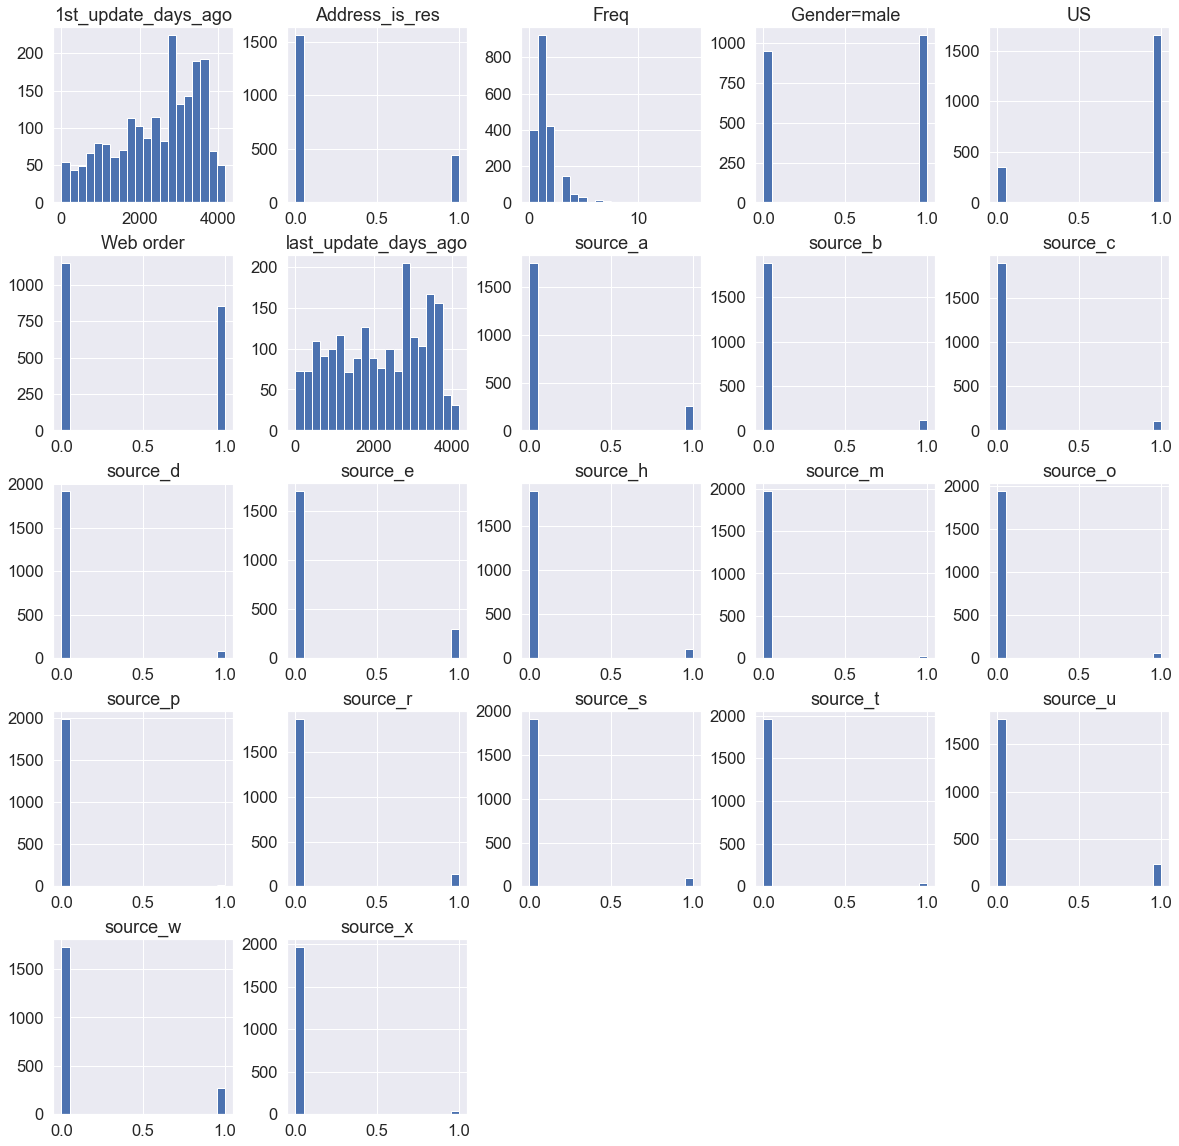

In [14]:
X.hist(bins=20, figsize=(20, 20))

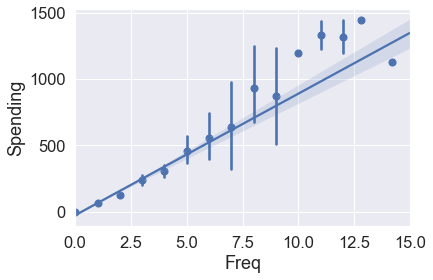

In [42]:
# from this plot, we can see that the relationship between Freq and Spending 
# cannot be well described by a simple linear line
# when Freq is large, a linear estimator under-estimate the spending
import seaborn as sns
sns.regplot(hw4['Freq'], hw4['Spending'],x_bins=5000)

In [16]:
# add the upsold and Freq^2 column
X_fe = hw4.iloc[:,1:23]
conditions = [
    X_fe['1st_update_days_ago'] > X_fe['last_update_days_ago'], 
    X_fe['1st_update_days_ago'] <= X_fe['last_update_days_ago']]

choices = [1, 0]

X_fe['upsold'] = np.select(conditions, choices, default=np.nan)
X_fe['Freq_2'] = X_fe['Freq']**2

### Test Performance

In [17]:
# Linear
slr = LinearRegression()
score_slr = cross_val_score(slr, X=X_fe, y=y, cv=cv, scoring='neg_root_mean_squared_error')
print("CV Accuracy: ",score_slr.mean(), " +/- ", score_slr.std())

CV Accuracy:  -125.54092647755286  +/-  21.75364733741159


In [18]:
# kNN
scaler = StandardScaler()
scaler.fit(X_fe)
X_f_std = scaler.transform(X_fe)

knn = neighbors.KNeighborsRegressor(n_neighbors=5)
score_knn = cross_val_score(knn, X=X_f_std, y=y, cv=cv, scoring='neg_root_mean_squared_error')
print("CV Accuracy: ",score_knn.mean(), " +/- ", score_knn.std())

CV Accuracy:  -139.70210893736152  +/-  24.15244149123583


In [19]:
# Tree
dt = DecisionTreeRegressor(random_state=42)
score_dt = cross_val_score(dt, X=X_fe, y=y, cv=cv, scoring='neg_root_mean_squared_error')
print("CV Accuracy: ",score_dt.mean(), " +/- ", score_dt.std())

CV Accuracy:  -157.09883772733815  +/-  27.757989436383433


## Part 3

In [20]:
# Linear
params = {'fit_intercept': ['True','False'],
          'normalize': ['True','False']}

gs_lr = GridSearchCV(estimator=LinearRegression(),
                  param_grid=params,
                  scoring='neg_root_mean_squared_error',
                  cv=inner_cv,
                  n_jobs=4)

gs_lr = gs_lr.fit(X_fe,y) 
print("Non-nested CV Accuracy: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)

nested_score_gs_lr = cross_val_score(gs_lr, X=X_fe, y=y, cv=cv)
print("Nested CV Accuracy: ",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())

Non-nested CV Accuracy:  -125.54092647755263
Optimal Parameter:  {'fit_intercept': 'True', 'normalize': 'True'}
Optimal Estimator:  LinearRegression(fit_intercept='True', normalize='True')
Nested CV Accuracy:  -125.54092647755263  +/-  21.753647337411287


In [21]:
# Lasso
from sklearn.linear_model import Lasso
params = {'alpha': list(np.arange(0.01,1,0.01))}

gs_la = GridSearchCV(estimator=Lasso(),
                  param_grid=params,
                  scoring='neg_root_mean_squared_error',
                  cv=inner_cv,
                  n_jobs=4)

gs_la = gs_la.fit(X_fe,y) 
print("Non-nested CV Accuracy: ", gs_la.best_score_)
print("Optimal Parameter: ", gs_la.best_params_)
print("Optimal Estimator: ", gs_la.best_estimator_)

nested_score_gs_la = cross_val_score(gs_la, X=X_fe, y=y, cv=cv)
print("Nested CV Accuracy: ",nested_score_gs_la.mean(), " +/- ", nested_score_gs_la.std())

Non-nested CV Accuracy:  -125.35673665032937
Optimal Parameter:  {'alpha': 0.28}
Optimal Estimator:  Lasso(alpha=0.28)
Nested CV Accuracy:  -125.36794338912821  +/-  21.919753843447705


In [22]:
# Ridge
from sklearn.linear_model import Ridge
params = {'alpha': list(np.arange(0.01,1,0.01))}

gs_rg = GridSearchCV(estimator=Ridge(),
                  param_grid=params,
                  scoring='neg_root_mean_squared_error',
                  cv=inner_cv,
                  n_jobs=4)

gs_rg = gs_rg.fit(X_fe,y) 
print("Non-nested CV Accuracy: ", gs_rg.best_score_)
print("Optimal Parameter: ", gs_rg.best_params_)
print("Optimal Estimator: ", gs_rg.best_estimator_)

nested_score_gs_rg = cross_val_score(gs_rg, X=X_fe, y=y, cv=cv)
print("Nested CV Accuracy: ",nested_score_gs_rg.mean(), " +/- ", nested_score_gs_rg.std())

Non-nested CV Accuracy:  -125.52208880906838
Optimal Parameter:  {'alpha': 0.99}
Optimal Estimator:  Ridge(alpha=0.99)
Nested CV Accuracy:  -125.52208880906842  +/-  21.76601210785287


In [43]:
# kNN
params = {'n_neighbors': list(np.arange(1,20,1)),
          'weights': ['uniform', 'distance'],
          'p': [1,2]}

gs_knn = GridSearchCV(estimator=neighbors.KNeighborsRegressor(metric='minkowski'),
                  param_grid=params,
                  scoring='neg_root_mean_squared_error',
                  cv=inner_cv,
                  n_jobs=4)

X_f_std = scaler.transform(X_fe)
gs_knn = gs_knn.fit(X_f_std,y) 
print("Non-nested CV Accuracy: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)

nested_score_gs_knn = cross_val_score(gs_knn, X=X_f_std, y=y, cv=cv)
print("Nested CV Accuracy: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())

Non-nested CV Accuracy:  -132.38084066010924
Optimal Parameter:  {'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsRegressor(n_neighbors=12, p=1)
Nested CV Accuracy:  -133.94044056694852  +/-  25.450987992246944


In [44]:
# Tree
gs_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                  param_grid=[{'max_depth': list(np.arange(3,10,2)),
                               'max_leaf_nodes':list(np.arange(7,18,3)),
                               'min_impurity_decrease': list(np.arange(0.001,0.01,0.002)),
                               'min_samples_leaf': list(np.arange(1,8,2)),
                               'criterion' : ["mse", "friedman_mse", "mae"]}],
                  scoring='neg_root_mean_squared_error', 
                  cv=inner_cv,
                  n_jobs=4)

gs_dt = gs_dt.fit(X_fe,y)
print("Non-nested CV Accuracy: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)

nested_score_gs_dt = cross_val_score(gs_dt, X=X_fe, y=y, cv=cv)
print("Nested CV Accuracy: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())

Non-nested CV Accuracy:  -129.82280283801714
Optimal Parameter:  {'criterion': 'mse', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1}
Optimal Estimator:  DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10,
                      min_impurity_decrease=0.001, random_state=42)
Nested CV Accuracy:  -133.94044056694852  +/-  25.450987992246944
